In [33]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [18]:
# dataset
dataset = pd.read_excel("dataset/Sales_Forecast_Data.xlsx")
# ABC Manufacturing company observations
abc_dataset = dataset[dataset['COMPANY']=='ABC Manufacturing']
abc_dataset.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


In [73]:
# Financial year last quarter month
FIN_YEAR_LAST_QUAT_MONTH = ['Jan', 'Feb', 'Mar']

# Converting month year to date
def convert_month_year_date(month, year):
    datetime_object = datetime.strptime(month, "%b")
    month = datetime_object.strftime("%B")
    string_date = f"1 {month}, {year}"
    date_converted = datetime.strptime(string_date, '%d %B, %Y')
    return date_converted.strftime('%Y-%m-%d')
    
# Converting fin year month to year month date
def convert_fin_year_month_to_year_month_date(row):
    # splitting years
    years = row['FIN_YEAR'].split('-')
    
    # If finacial year last quarter
    if row['MONTH'] in FIN_YEAR_LAST_QUAT_MONTH:
        return convert_month_year_date(row['MONTH'], years[1])
    else:
        return convert_month_year_date(row['MONTH'], years[0])

# Creating date from fin year and month 
converted_date = abc_dataset.apply (lambda row: convert_fin_year_month_to_year_month_date(row), axis=1)
# converted_date.reset_index(drop=True, inplace=True)
print(pd.DataFrame(converted_date))

                 0
49      2014-12-01
50      2014-12-01
51      2014-12-01
52      2014-12-01
53      2014-12-01
...            ...
230090  2017-02-01
230144  2016-12-01
230145  2016-12-01
230146  2016-12-01
230147  2016-12-01

[28640 rows x 1 columns]


In [7]:
# analysis
abc_dataset.info() # total 28640
print(abc_dataset.VALUE.describe())
print(abc_dataset.FIN_YEAR.unique())
print(abc_dataset.MONTH.unique())
print(abc_dataset.STATE.unique())
print(abc_dataset.FG.unique())
print(abc_dataset.DISTRICT.unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28640 entries, 49 to 230147
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIN_YEAR  28640 non-null  object 
 1   MONTH     28640 non-null  object 
 2   STATE     28640 non-null  object 
 3   FG        28640 non-null  object 
 4   DISTRICT  28640 non-null  object 
 5   COMPANY   28640 non-null  object 
 6   VALUE     28640 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB
count    28640.000000
mean      1796.852611
std       4290.020075
min          0.000000
25%          0.000000
50%         36.382500
75%       1278.180000
max      69828.750000
Name: VALUE, dtype: float64
['2014-2015' '2015-2016' '2016-2017' '2017-2018']
['Dec' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Apr' 'Feb' 'Jan' 'Mar' 'May' 'Jun']
['Haryana' 'Himachal Pradesh' 'Punjab' 'Uttar Pradesh' 'Uttarakhand']
['Insecticides' 'Herbicides' 'Rodenticides' 'Bactericides']
['Ambala' 'Yamunanagar' 'Karn

In [8]:
# ['Haryana' 'Himachal Pradesh' 'Punjab' 'Uttar Pradesh' 'Uttarakhand']
abc_haryana_dataset = abc_dataset[abc_dataset['STATE']=='Haryana']
abc_himachal_dataset = abc_dataset[abc_dataset['STATE']=='Himachal Pradesh']
abc_punjab_dataset = abc_dataset[abc_dataset['STATE']=='Punjab']
abc_uttarpradesh_dataset = abc_dataset[abc_dataset['STATE']=='Uttar Pradesh']
abc_uttarakhand_dataset = abc_dataset[abc_dataset['STATE']=='Uttarakhand']

abc_himachal_dataset.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
141,2014-2015,Jul,Himachal Pradesh,Insecticides,Kangra,ABC Manufacturing,3075.300
142,2014-2015,Jul,Himachal Pradesh,Insecticides,Kullu,ABC Manufacturing,89.100
143,2014-2015,Jul,Himachal Pradesh,Insecticides,Mandi,ABC Manufacturing,1561.005
144,2014-2015,Jul,Himachal Pradesh,Insecticides,Hamirpur,ABC Manufacturing,133.650
145,2014-2015,Jul,Himachal Pradesh,Insecticides,Bilaspur,ABC Manufacturing,2568.915


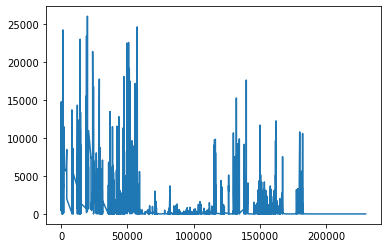

In [9]:
plt.plot(abc_haryana_dataset['VALUE'])

In [10]:
from datetime import datetime

s = "8 March, 2017"
d = datetime.strptime(s, '%d %B, %Y')
print(d.strftime('%Y-%m-%d'))
# print(d.strftime('%Y-%m-%d'))

2017-03-08
